# Market Mood & Moves – Week 1

**Name:** Ananya Reddy  
**project:** Sentiment-Driven Stock Prediction  

## Project Overview
Stock markets are often influenced,not just by numbers, but also by how people
react to news and events. This project focuses on understanding how market
sentiment, especially from financial news, can impact short-term stock price
movements.

By using natural language processing techniques along with historical
stock price data, our aim is to study these sentiment patterns and build a
strong foundation for sentiment-based market prediction models in the coming
weeks.



## python programming fundamentals 

In [7]:


# practical exercise 1 : average stock prices 
stock_prices = [142, 145, 148, 150, 147, 149, 151, 153, 150, 152]

def calculate_average(prices):
    total = 0
    for price in prices:
        total += price
    return total / len(prices)

avg_price = calculate_average(stock_prices)
avg_price



148.7

In [8]:
# practical exercise 2 : classifying stocks as expensive or affordable 

def classify_stock(price):
    if price > 150:
        return "Expensive"
    return "Affordable"

classification = classify_stock(avg_price)
classification



'Affordable'

In [9]:
# practical exercise 3 : loop for computing daily returns 

daily_returns = []

for i in range(1, len(stock_prices)):
    change = stock_prices[i] - stock_prices[i - 1]
    daily_returns.append(change)

daily_returns


[3, 3, 2, -3, 2, 2, 2, -3, 2]

## Data manipulation with Pandas 

In [ ]:


import pandas as pd
import numpy as np

# Step 1: Load a stock price CSV file
# I’m assuming the CSV has columns like Date, Close_Price, Sentiment_Score, etc.
df = pd.read_csv('stock_prices.csv', parse_dates=['Date'])

# Setting the Date as the index so that time-based operations are easier
df.set_index('Date', inplace=True)

# Let's peek at the first few rows to make sure it loaded correctly
print("Here's what our data looks like:")
display(df.head())


# Step 2: Filter for days where sentiment exceeds 0.7
high_sentiment_days = df[df['Sentiment_Score'] > 0.7]

print("\nThese are the days where the market mood is positive:")
display(high_sentiment_days)


# Step 3: Calculating daily returns
# This is the difference in closing price from one day to the next, helps us see how much market moved by day 
df['Daily_Return'] = df['Close_Price'].diff()
# change in % terms 
df['Daily_Return_Percent'] = df['Close_Price'].pct_change() * 100
print("\nDaily returns :")
display(df.head())


# Step 4: weekly average closing price
# Resample by week and calculating mean closing price
weekly_avg_price = df['Close_Price'].resample('W').mean()

print("\nWeekly average closing prices :")
display(weekly_avg_price)


## Numerical computing with NumPy

In [12]:

import numpy as np

# exercise 1: Create an array of 10 stock prices
# Let us assume the closing prices of stocks over 10 days as follows 
stock_prices = np.array([150, 152, 149, 155, 157, 153, 158, 160, 159, 162])

print("Stock prices for 10 days:")
print(stock_prices)

# exercise 2: Calculate basic statistics

mean_price = np.mean(stock_prices)         # Average price
std_price = np.std(stock_prices)            # Volatility
min_price = np.min(stock_prices)            # Lowest price
max_price = np.max(stock_prices)          # Highest price

print("\nBasic statistics:")
print("Mean price:", mean_price)
print("Standard deviation (Volatility):", std_price)
print("Minimum price:", min_price)
print("Maximum price:", max_price)


# Exercise 3: Creating a 2D array (5 days x 3 stocks)

# Rows represent days and columns represent different stocks

prices_2d = np.array([
    [100, 102, 98],
    [101, 103, 99],
    [102, 104, 100],
    [101, 105, 102],
    [103, 106, 104]
])

print("\n2D array of stock prices for 5 days x 3 stocks :")
print(prices_2d)

# Exercise 4: Calculate daily returns using np.diff()

# np.diff() calculates the difference between consecutive elements, directly giving daily price changes 

daily_returns = np.diff(stock_prices)

print("\nDaily returns (Price_t - Price_t-1):")
print(daily_returns)


Stock prices for 10 days:
[150 152 149 155 157 153 158 160 159 162]

Basic statistics:
Mean price: 155.5
Standard deviation (Volatility): 4.177319714841085
Minimum price: 149
Maximum price: 162

2D array of stock prices for 5 days x 3 stocks :
[[100 102  98]
 [101 103  99]
 [102 104 100]
 [101 105 102]
 [103 106 104]]

Daily returns (Price_t - Price_t-1):
[ 2 -3  6  2 -4  5  2 -1  3]


## Natural Language Processing fundamentals 

In [2]:


!pip install nltk
import nltk
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1032)>


False

## Text Preprocessing 

In [ ]:


# Tokenization breaks text into smaller units
from nltk.tokenize import word_tokenize
text = "Apple stock surges 5% on strong earnings!"

tokens = word_tokenize(text)

print("Original text:")
print(text)

print("\nTokens:")
print(tokens)
 
# Stop words are common words that usually do not add much meaning
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# word.isalpha() is used to check to the word contains only alphabets, cuz tokens like 5, %, ! are not useful for sentiment analysis

filtered_tokens = [
    word for word in tokens 
    if word.lower() not in stop_words and word.isalpha()
]

print("\nTokens after removing stop words:")
print(filtered_tokens)

# Lemmatization reduces words to their basic form while preserving meaning
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [
    lemmatizer.lemmatize(word, pos='v') 
    for word in filtered_tokens
]

print("\nLemmatized tokens:")
print(lemmatized_tokens)



## API based data collection 

In [24]:


!pip install newsapi-python

# News API integration 

from newsapi import NewsApiClient

api = NewsApiClient(api_key='eba17c3d0dc94f05bf8a27ecda5e19b3')

headlines = api.get_top_headlines(
    category='business',
    language='en',
    page_size=10
)

print(type(headlines))
print(headlines.keys())


!pip install yfinance


# Stock data via yfinance 

import yfinance as yf

data = yf.download('AAPL', start='2024-01-01', end='2024-12-31')
print(data.head())




<class 'dict'>
dict_keys(['status', 'totalResults', 'articles'])


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  183.903214  186.677021  182.169586  185.399081  82488700
2024-01-03  182.526215  184.140970  181.713879  182.496496  58414500
2024-01-04  180.208160  181.377114  179.187798  180.445905  71983600
2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
2024-01-08  183.823975  183.863609  179.801961  180.386437  59144500


## Sentiment analysis 


In [35]:

# VADER sentiment analyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
score = sia.polarity_scores("Apple stock surges on strong earnings!")
print(score)

# in the output, pos, neg, neu are sentiment proportions and compound is final sentiment score 

# applying VADER to NewsAPI headlines 
print("Headline Sentiment Analysis:\n")

for article in headlines['articles']:
   title = article['title']
   sentiment = sia.polarity_scores(title)
    
print(f"Title: {title}")
print(f"Sentiment: {sentiment['compound']}\n")

# FinBERT for Financial text 

!pip install transformers torch 

from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')
inputs = tokenizer("Apple reports record profits", return_tensors='pt')
outputs = model(**inputs)
probs = torch.softmax(outputs.logits, dim=1)
print(probs)


{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.5562}
Headline Sentiment Analysis:

Title: Suspicious bets on Maduro’s removal raise eyebrows as user nets over US$400,000 - South China Morning Post
Sentiment: -0.3612



model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tensor([[0.6243, 0.1985, 0.1772]], grad_fn=<SoftmaxBackward0>)


## Challenges 

In [36]:


# Challenge 1 : Professional Data Storage 
# using SQLite , SQLite is a mini local database file where we can store, query, update data using SQL

import pandas as pd
import sqlite3

# Step 1: sample dataframe
data = {
    'Date': pd.date_range('2024-01-01', periods=5, freq='D'),
    'Stock': ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA'],
    'Close_Price': [150, 2800, 310, 3400, 700]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Step 2: Connecting to SQLite database
conn = sqlite3.connect("stocks.db")

# Step 3: Saving dataframe to SQLite table
df.to_sql('stock_prices', conn, if_exists='replace', index=False)
print("\nData saved to SQLite database 'stocks.db' in table 'stock_prices'.")

# Step 4: Query data back from SQLite
query_result = pd.read_sql("SELECT * FROM stock_prices WHERE Close_Price > 1000", conn)
print("\nQuery Result:\n", query_result)

# Step 5: Close connection
conn.close()



# using Parquet, Parquet is a compressed columnar format, preferred for big data

# Step 1: Saving DataFrame to Parquet
df.to_parquet("stock_prices.parquet", engine='pyarrow', index=False)
print("Data saved to 'stock_prices.parquet'")

# Step 2: Reading it back
df_parquet = pd.read_parquet("stock_prices.parquet", engine='pyarrow')
print("\nRead from Parquet:\n", df_parquet)





Original DataFrame:
         Date Stock  Close_Price
0 2024-01-01  AAPL          150
1 2024-01-02  GOOG         2800
2 2024-01-03  MSFT          310
3 2024-01-04  AMZN         3400
4 2024-01-05  TSLA          700

Data saved to SQLite database 'stocks.db' in table 'stock_prices'.

Query Result:
                   Date Stock  Close_Price
0  2024-01-02 00:00:00  GOOG         2800
1  2024-01-04 00:00:00  AMZN         3400
Data saved to 'stock_prices.parquet'

Read from Parquet:
         Date Stock  Close_Price
0 2024-01-01  AAPL          150
1 2024-01-02  GOOG         2800
2 2024-01-03  MSFT          310
3 2024-01-04  AMZN         3400
4 2024-01-05  TSLA          700


In [39]:
# challenge 2 : Named Entity Recognition Filter 


!pip install spacy
# downloading the small english model
!python -m spacy download en_core_web_sm             
  
import spacy           # loading spacy english model 
nlp = spacy.load("en_core_web_sm")

# checking if the company name in the article is recognized as ORG by spacy 

def is_company_entity(article_title, company_name):  
    doc = nlp(article_title)
    for ent in doc.ents:
        if ent.text.lower() == company_name.lower() and ent.label_ == "ORG":
            return True
    return False


# applying Named Entity recognition filter to NewsAPI headlines 
# Example: Filter headlines for "Apple"
company_name = "Apple"

filtered_articles = []

for article in headlines['articles']:
    title = article['title']
    if is_company_entity(title, company_name):
        filtered_articles.append(article)

print(f"Total articles after filtering for '{company_name}' as ORG: {len(filtered_articles)}\n")

# Displaying filtered titles
for art in filtered_articles:
    print(art['title'])



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 8.5 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 8.9 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 8.9 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 9.0 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 8.6 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 8.6 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 8.7 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 8.3 MB/s  0:00:01
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Total articles after filtering for 'Apple' as ORG: 0



[*********************100%***********************]  1 of 1 completed


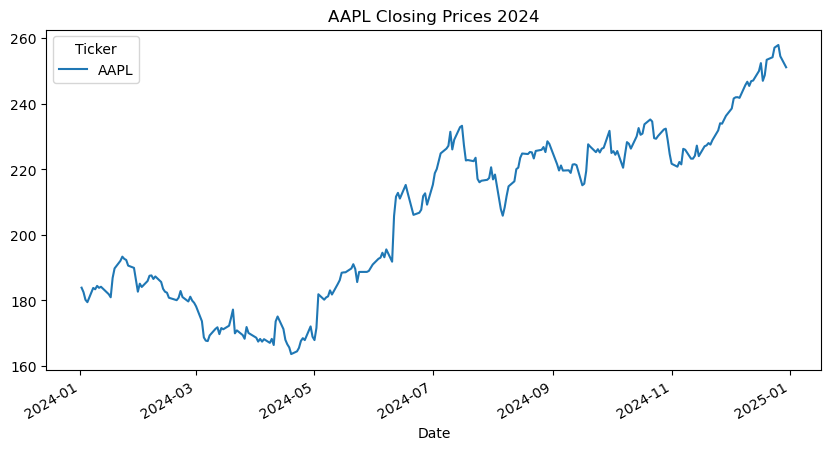

ADF Statistic: -0.1943
p-value: 0.9392
Data is non-stationary


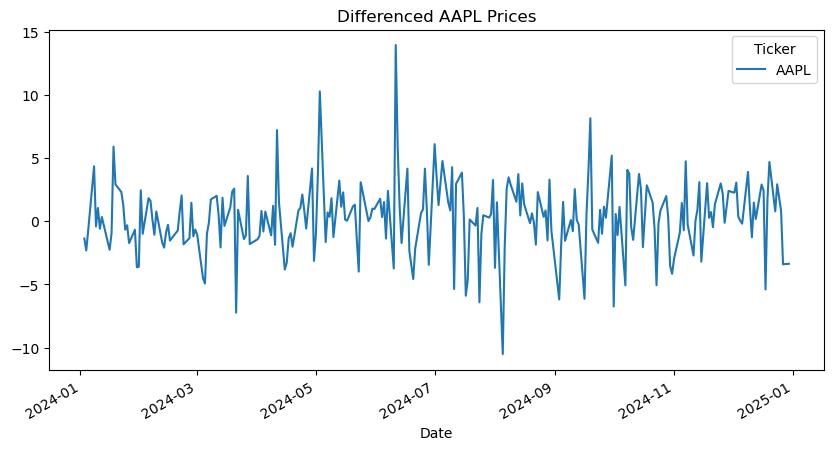

Differenced Series p-value: 0.0000
Differenced data is stationary


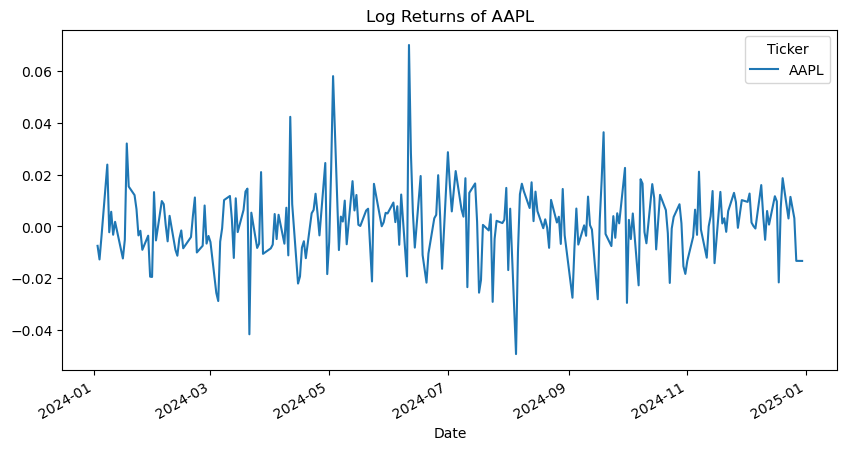

Log Returns p-value: 0.0000
Log returns are stationary


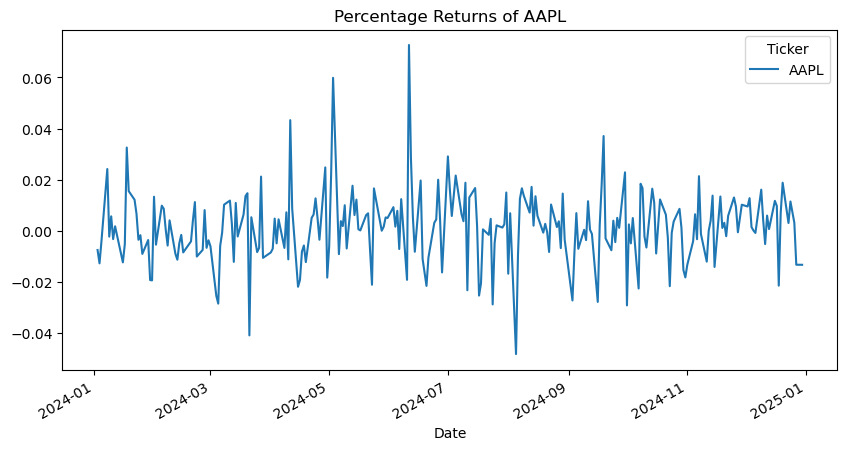

Percentage Returns p-value: 0.0000
Percentage returns are stationary


In [42]:
# challenge 3: Stationary Testing 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# loading the stock price data 
data = yf.download('AAPL', start='2024-01-01', end='2024-12-31')

prices = data['Close']

# plotting prices to see the trend 
prices.plot(title='AAPL Closing Prices 2024', figsize=(10,5))
plt.show()

# performing Augmented-Dickey-Fuller (ADF) test 
result = adfuller(prices)
p_value = result[1]

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

# transforming the data, we do this to make data stationary. We are using differencing here 
diff_prices = prices.diff().dropna()

# Plot differenced series
diff_prices.plot(title='Differenced AAPL Prices', figsize=(10,5))
plt.show()

# ADF test on differenced data
result_diff = adfuller(diff_prices)
p_value_diff = result_diff[1]
print(f"Differenced Series p-value: {p_value_diff:.4f}")

if p_value_diff < 0.05:
    print("Differenced data is stationary")
else:
    print("Still non-stationary")


# can be done using log returns as follows 
log_returns = np.log(prices / prices.shift(1)).dropna()

log_returns.plot(title='Log Returns of AAPL', figsize=(10,5))
plt.show()

# ADF test on log returns
result_log = adfuller(log_returns)
p_value_log = result_log[1]
print(f"Log Returns p-value: {p_value_log:.4f}")

if p_value_log < 0.05:
    print("Log returns are stationary")
else:
    print("still non-stationary")




# can be done using Percentage returns as follows 
pct_returns = prices.pct_change().dropna()

pct_returns.plot(title='Percentage Returns of AAPL', figsize=(10,5))
plt.show()

# ADF test
result_pct = adfuller(pct_returns)
p_value_pct = result_pct[1]
print(f"Percentage Returns p-value: {p_value_pct:.4f}")

if p_value_pct < 0.05:
    print("Percentage returns are stationary")
else:
    print("still non-stationary")





In [43]:
# Challenge 4 : Timezone alignment


from datetime import datetime, time
import pandas as pd
from pandas.tseries.offsets import BusinessDay
# for timezone conversion
import pytz 

# defining market time in IST 
MARKET_CLOSE = time(15, 30)

# Sample news data with timestamps in UTC, often API return UTC
news_data = pd.DataFrame({
    'title': [
        "Apple announces earnings",
        "Amazon expands in India",
        "Tesla stock surges after hours",
        "Global markets react to inflation"
    ],
    'timestamp_utc': [
        "2024-01-05 10:00:00",
        "2024-01-05 14:00:00",
        "2024-01-05 21:00:00",   #after market closes
        "2024-01-06 03:00:00"    #weekend consideration example
    ]
})

# Converting timestamp column to datetime
news_data['timestamp_utc'] = pd.to_datetime(news_data['timestamp_utc'], utc=True)

# Function to map news timestamp to correct trading day in IST
def map_to_trading_day(timestamp_utc):
    # Step 1: Convert UTC to IST
    ist = pytz.timezone('Asia/Kolkata')
    timestamp_ist = timestamp_utc.tz_convert(ist)

# Handling weekends
    if timestamp_ist.weekday() >= 5:             # Saturday=5, Sunday=6
        # If it's weekend, map to next Monday
        next_monday = timestamp_ist + pd.offsets.BDay(1)
        return next_monday.date()
    
# for mapping news after market closes to next day trading 
    if timestamp_ist.time() > MARKET_CLOSE:
        return (timestamp_ist + BusinessDay(1)).date()
    
# otherwise, mapping to same day trading 
    return timestamp_ist.date()

# applying this function to all news 
news_data['trading_day'] = news_data['timestamp_utc'].apply(map_to_trading_day)

# displaying results : 
print("News mapped to trading days:")
display(news_data)


News mapped to trading days:


,title,timestamp_utc,trading_day
0,Apple announces earnings,2024-01-05 10:00:00+00:00,2024-01-05
1,Amazon expands in India,2024-01-05 14:00:00+00:00,2024-01-08
2,Tesla stock surges after hours,2024-01-05 21:00:00+00:00,2024-01-08
3,Global markets react to inflation,2024-01-06 03:00:00+00:00,2024-01-08
